<div style="display: flex; background-color: RGB(203, 192, 225);" >
<h1 style="margin: auto; padding: 30px; ">Projet Inclusion Financière: ML Modèles</h1>
</div>

Objectif du projet : il s'agit de développer une solution d'aide à la décision basée sur le Machine Learning  permettant à un conseiller financier de décider si un client a le droit ou non à l'ouverture d'un compte bancaire. Une telle solution doit prendre en compte l'aspect confidentiel des données client.

# Import des librairies

J'importe toutes les librairies nécessaire pour mon code 

In [3]:
#import des librairie basiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# split
from sklearn.model_selection import train_test_split

# modèles
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# métriques d'évaluations
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

# Unbalanced data
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
# from boruta import BorutaPy
# from sklearn.ensemble import RandomForestClassifier

# warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Import de mes données

J'importe mes données (en Dataframe). Elles ont été nettoyées et préparées pour la modélisation sur le notebook EDA

In [4]:
df = pd.read_csv("data/df_enc.csv")

In [5]:
df.head(5)

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


# Fonctions : entrainement et évaluation du model

Voici les principales fonctions qui permettent d'entrainer, d'evaluer et de comparer nos modèles : 
- plot_confusion_matrix : permer d'afficher une matrice de confusion bien présenter et plus lisible
- ROC_curve : permet de plot la courbe ROC de notre modèle
- eval_model : évalue un model avec le report de classification, la matrice de confusion, et la ROC curve cité au-dessus
- resultats_models : nous affiche plusieurs évaluations de différents modèles pour qu'on puisse les comparer

In [6]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
     acc = round(accuracy_score(y, y_pred), 2)
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.title('Accuracy Score: {0}'.format(acc), size=10)
     plt.show()

In [7]:
# ROC Curve
def ROC_curve(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.show()

In [8]:
def eval_model(df, model):
    # split feature - target
    X = df.drop(["bank_account"], axis = 1)
    y = df["bank_account"]
    # split en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # train du model 
    model.fit(X_train, y_train)
    # prédiction
    y_pred = model.predict(X_test)
    # Evaluation de la performance du model 
    print(f"===================   {model}   ====================")
    print(classification_report(y_test, y_pred))
    print("Matrice de confusion :")
    print(plot_confusion_matrix(y_test, y_pred))
    print("Courbe ROC : ")
    print(ROC_curve(model, X_test, y_test))

In [9]:
def resultats_models(df, models: list):
    for i in models:
        evaluation = eval_model(df, i)
    return evaluation

# Comparer les différents modèles 

In [10]:
# Je créer la liste qui contient tout les modèles à comparer
liste_models = [DummyClassifier(strategy= 'stratified'), LogisticRegression(class_weight='balanced'),
                DecisionTreeClassifier(), GaussianNB()]

===================   DummyClassifier(strategy='stratified')   ====================
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4005
           1       0.15      0.14      0.14       700

    accuracy                           0.75      4705
   macro avg       0.50      0.50      0.50      4705
weighted avg       0.75      0.75      0.75      4705

Matrice de confusion :


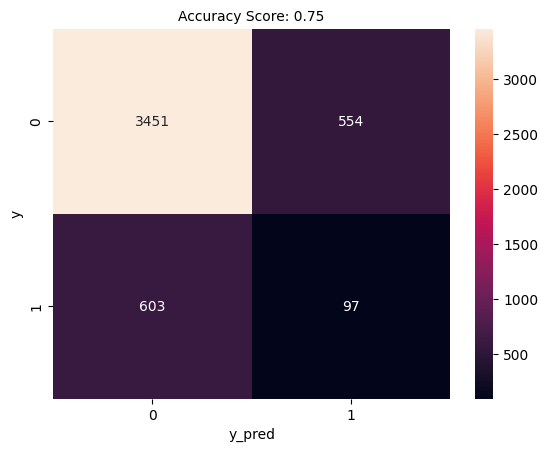

None
Courbe ROC : 


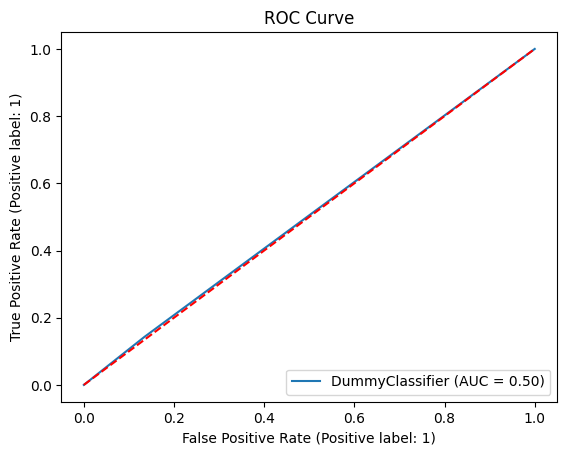

None
===================   LogisticRegression(class_weight='balanced')   ====================
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      4005
           1       0.38      0.75      0.50       700

    accuracy                           0.78      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.86      0.78      0.80      4705

Matrice de confusion :


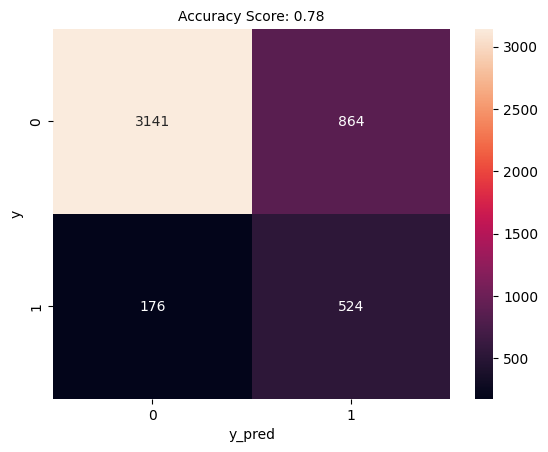

None
Courbe ROC : 


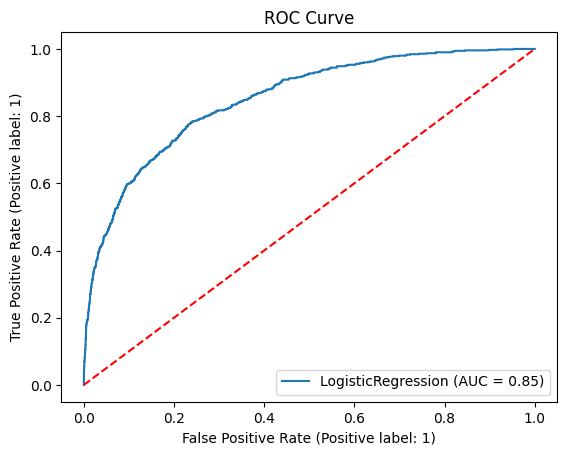

None
===================   DecisionTreeClassifier()   ====================
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4005
           1       0.43      0.41      0.42       700

    accuracy                           0.83      4705
   macro avg       0.66      0.66      0.66      4705
weighted avg       0.83      0.83      0.83      4705

Matrice de confusion :


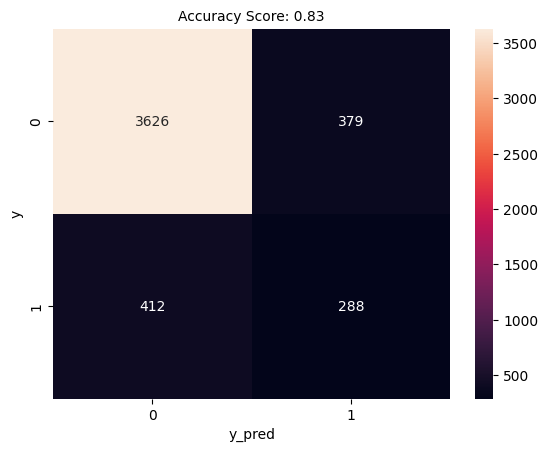

None
Courbe ROC : 


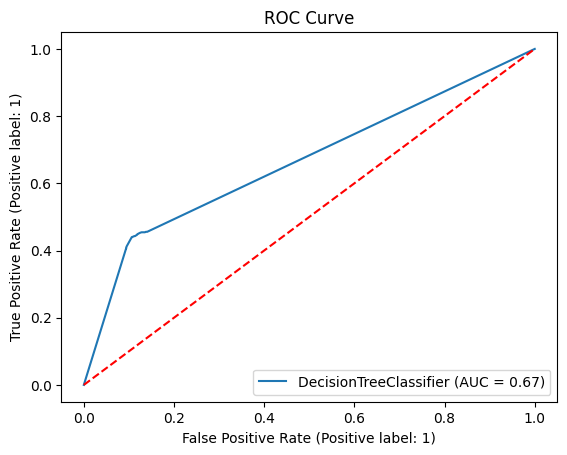

None
===================   GaussianNB()   ====================
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4005
           1       0.52      0.53      0.52       700

    accuracy                           0.86      4705
   macro avg       0.72      0.72      0.72      4705
weighted avg       0.86      0.86      0.86      4705

Matrice de confusion :


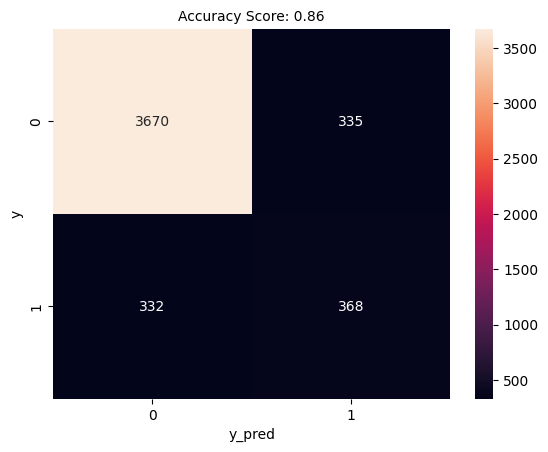

None
Courbe ROC : 


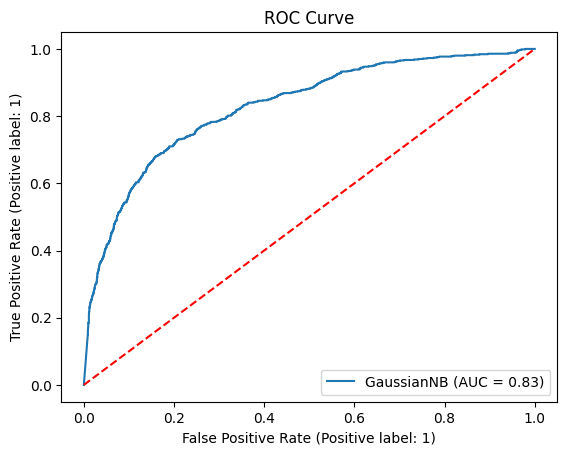

None


In [11]:
resultats_models(df, liste_models)

Interprétation des résultats : 
- Baseline model : DummyClassifier prediction, recall, f1-score très mauvais sur la class 1. Courbe ROC montre que les prédictions de notre modèle sont équivalente à du hasard 
- LogisticRegression : pour la classe 1: prediction(38%) assez bas, recall(75%) bien augmenté et un f1-score(50%) moyen. On voit sur la Courbe ROC que le model discerne assez bien les 2 classes
- DesicionTreeClassifier : pour la classe 1: prediction(43%) assez bas, recall(41%) assez bas et f1-score(42%) assez bas. Globalement on voit que les métriques ne sont pas très bonnes et que notre modèle n'arrive pas à bien prédire sur une observation appartenant à la classe 1 (unbalanced data)
- GaussianNB : pour la classe 1 : prediction(52%) moyen, recall(53%) moyen, f1-score(52%) moyen. Globalement les métrique sont moyennes voir mauvaises

Conclusion :

Notre meilleur model et le plus équilibré reste pour l'instant Le Naive Bayes(GaussianNb). Car en effet on a autant besoin d'une bonne présicion (ne pas se tromper lorsque l'on prédit qu'un client peut ouvrir un compte -- diminuer Faux positif) que d'un bon recall (Ne pas louper de clients qui peuvent ouvrir un compte -- diminuer Faux Négatif). 

Les métriques de la classe 1 sont mauvaises, c'est probablement du au fait que nos données sont mal équilibrées
Il va surement falloir trouver une solution pour les réequilibrer

# Evaluation du modèle avec les classes bien équilibré

Sur mon jeu de données, la classe 0 est beaucoup plus dominante que la classe 1. Donc nos modèles sont moins performant pour détecter une observation appartenant à la classe 1

Je souhaite donc rééquilibrer mes données dans l'objectif d'avoir autant d'observation appartenant à la classe 0 et à la classe 1 

## Fonction : équilibrage des données

balance_dataset : fonction qui créer un sample à partir d'un df de nb*2 rows avec autant de classe 0 que de classe 1 (nb rows de classe 0 et nb rows de classe 1)

In [12]:
def balance_dataset(df, nb):
    grouped = df.groupby('bank_account')
    df_sampled = grouped.apply(lambda x: x.sample(nb) if len(x) > nb else x)
    df_sampled = df_sampled.reset_index(drop=True)
    return df_sampled

## On équilibre les données

Je créer mon dataframe bien équilibré avec balanced_dataset

In [13]:
df_balanced = balance_dataset(df, 3300)

In [14]:
df_balanced["bank_account"].value_counts()

0    3300
1    3300
Name: bank_account, dtype: int64

## Comparer les différents modèles (données bien équilibrées)

===================   DummyClassifier(strategy='stratified')   ====================
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       646
           1       0.49      0.47      0.48       674

    accuracy                           0.48      1320
   macro avg       0.48      0.48      0.48      1320
weighted avg       0.48      0.48      0.48      1320

Matrice de confusion :


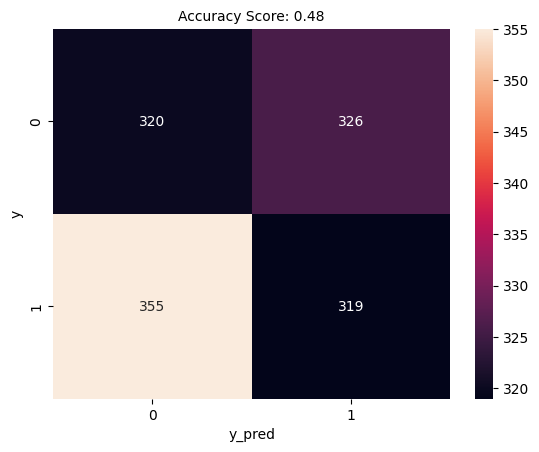

None
Courbe ROC : 


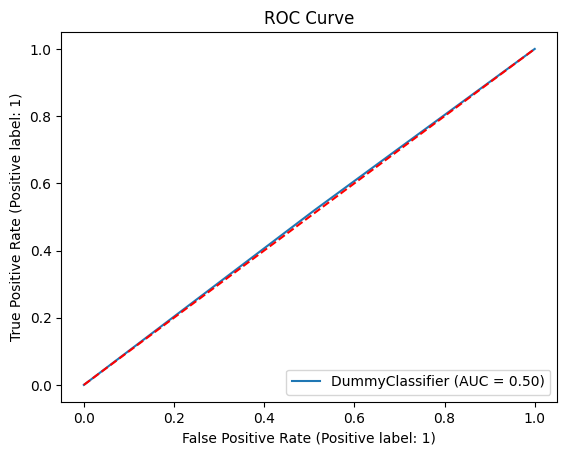

None
===================   LogisticRegression(class_weight='balanced')   ====================
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       646
           1       0.80      0.74      0.77       674

    accuracy                           0.77      1320
   macro avg       0.78      0.77      0.77      1320
weighted avg       0.78      0.77      0.77      1320

Matrice de confusion :


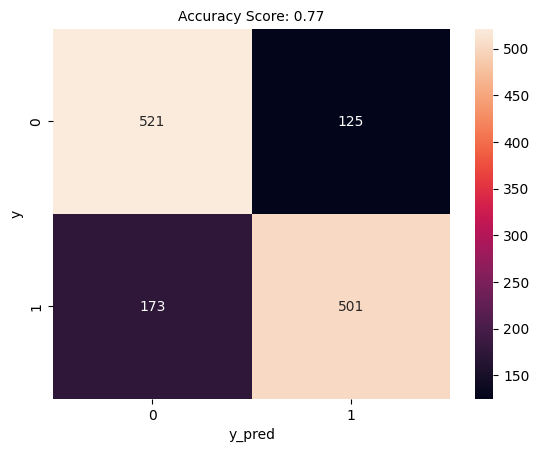

None
Courbe ROC : 


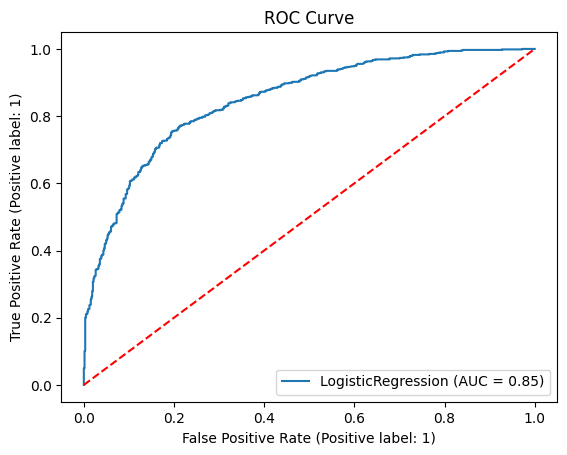

None
===================   DecisionTreeClassifier()   ====================
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       646
           1       0.73      0.69      0.71       674

    accuracy                           0.71      1320
   macro avg       0.71      0.71      0.71      1320
weighted avg       0.71      0.71      0.71      1320

Matrice de confusion :


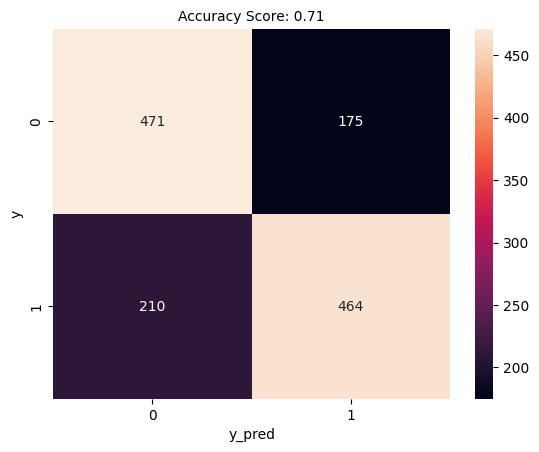

None
Courbe ROC : 


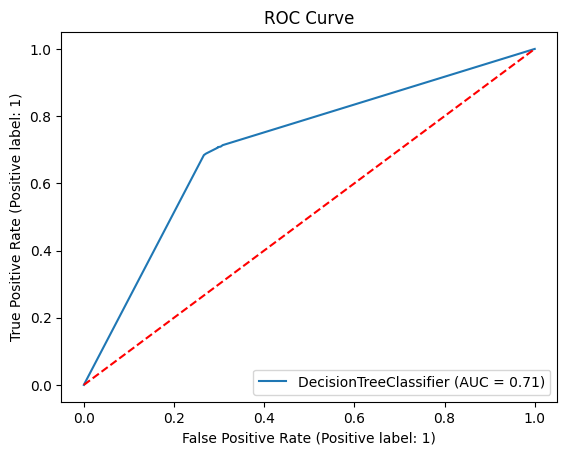

None
===================   GaussianNB()   ====================
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       646
           1       0.88      0.48      0.62       674

    accuracy                           0.70      1320
   macro avg       0.76      0.71      0.69      1320
weighted avg       0.76      0.70      0.69      1320

Matrice de confusion :


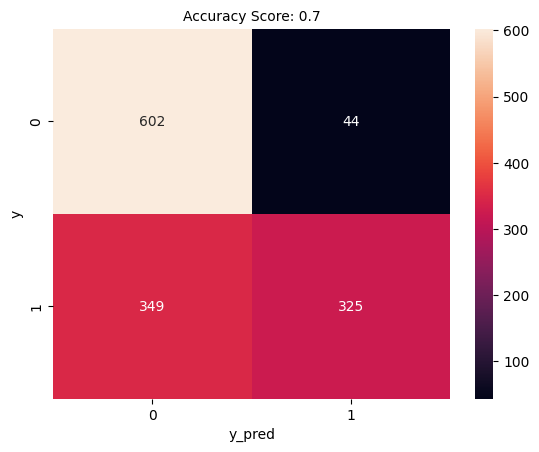

None
Courbe ROC : 


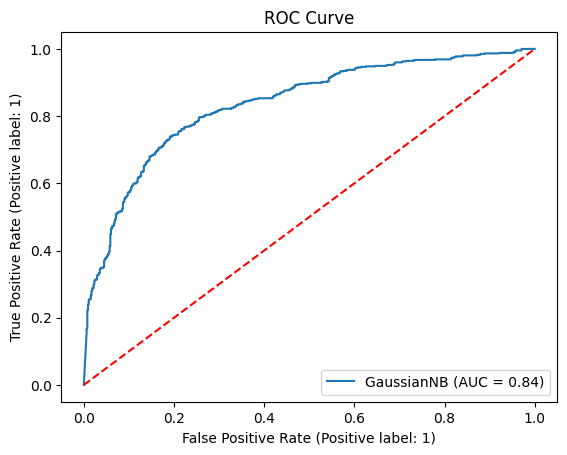

None


In [15]:
resultats_models(df_balanced, liste_models)

Interprétation des résultats : 
- Baseline model : DummyClassifier prediction, recall, f1-score bien équilibré sur les deux classes. Courbe ROC montre que les prédictions de notre modèle sont équivalente à du hasard. En effet, en moyenne toutes nos métriques sont à environ 50%.
- LogisticRegression : pour nos deux classes : métriques qui sont à environ 76%. On voit sur la Courbe ROC que le model discerne assez bien les 2 classes
- DesicionTreeClassifier : pour nos deux classes : métriques qui sont à environ 76%. On voit que notre modèle arrive beaucoup mieux à prédire sur une observation appartenant à la classe 1 (balanced data)
- GaussianNB : pour la classe 1 : prediction(83%) très bonne augmentation, recall(59%) assez moyen, f1-score(69%) assez bon. Globalement les métrique sont meilleurs qu'avant de balance surtout la précision. Mais on reste à un recall assez bas ce qui n'est pas optimal pour notre problème.

Conclusion :

Notre meilleur model et le plus équilibré devient la Logistic Regression. Car en effet on a autant besoin d'une bonne présicion (ne pas se tromper lorsque l'on prédit qu'un client peut ouvrir un compte -- diminuer Faux positif) que d'un bon recall (Ne pas louper de clients qui peuvent ouvrir un compte -- diminuer Faux Négatif). Et c'est la Logistique Régression qui nous offre le meilleur compromis entre ces deux métriques avec un f1-score de 76%.

On peut aussi constater qu'après avoir équilibré nos données on a des métriques beaucoup plus équilibrées entre nos deux classes

# Evaluation du modèle avec une sélection de feature

Certaine feature ont beaucoup plus d'importance et d'impacte sur la target que d'autre. On pourrait donc essayer de sélectionner seulement les features les plus importantes pour entrainer notre modèle. Cela nous permettrai de réduire la dimension de nos données drastiquement.

Mais comment faire, deux méthode s'offre à nous: une feature selection avec Boruta ou avec extratreesclassifier

On va commencer par Buruta mais on va plutôt utiliser Extratressclassifier

## Feature selection avec Boruta

Utilisation de la librairie Boruta pour effectué de la feature selection: Pour cela un random forest classifier est effectué.

In [ ]:
X = df.drop(["bank_account"], axis = 1)
y = df["bank_account"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)

boruta_selector va ensuit classer les feature par importance et donner le nombre de feature qui sont significativement importante dans le model

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=0)
boruta_selector.fit(np.array(X_train), np.array(y_train))  
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking') 

Ici, d'apres boruta_selector nous avons 22 features importante qui posséde le ranking de 1. Afin d'avoir d'autre avis sur la feature selection nous avons aussi utilisé la selection de feautre  avec Extratreesclassifier.

## Sélection de feature avec Extratreesclassifier

plot_feature_selection : fonction qui prends en entrée un df en un nombre de features qui sera affiché, puis plot un bar plot honzizontal qui montre l'importance de nos features sur la target

In [16]:
def plot_feature_selection(df, nb_feature):
    # split feature - target
    X = df.drop(["bank_account"], axis = 1)
    y = df["bank_account"]
    # train the extratreesclassifier
    model = ExtraTreesClassifier(max_depth=9)
    model.fit(X,y)
    # Plot un graph des features les plus importantes
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(nb_feature).plot(kind='barh')
    plt.show()

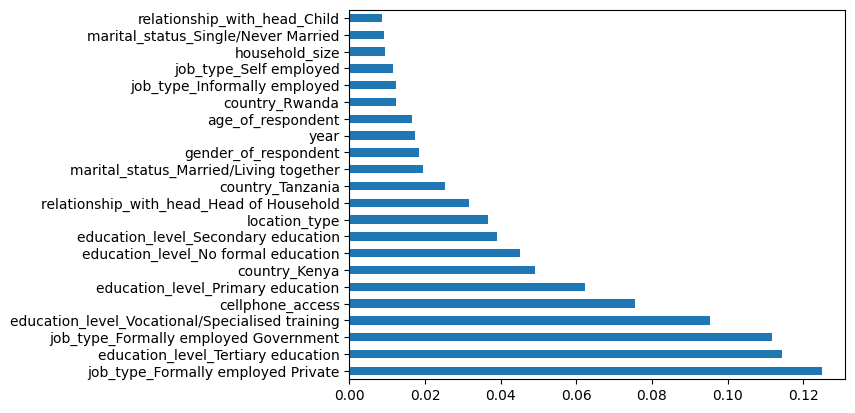

In [17]:
plot_feature_selection(df, 22)

feature_selection : fonction qui prend en entrée un df et un nombre de feature. Et qui renvoie un nouveau dataframe avec les le le même nombre de feature sélectionner par ordre d'importance des features sur la target

In [18]:
def feature_selection(df, nb_feature):
    df_1 = df.copy()
    # split feature - target
    X = df.drop(["bank_account"], axis = 1)
    y = df["bank_account"]
    # train the extratreesclassifier
    model = ExtraTreesClassifier(max_depth=9)
    model.fit(X,y)
    # pandas series des features les plus importantes
    feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
    feat_importances_sorted = feat_importances.sort_values(ascending = False)
    feat_importances_nb = feat_importances_sorted.head(nb_feature)
    # nouveau dataframe des features selectionnées
    index = feat_importances_nb.index
    df_feat_v1 = pd.DataFrame(df_1[index])
    df_feat = pd.concat([df_feat_v1, y], axis = 1)
    return df_feat

# Comparer les différents modèles (avec la sélection de feature)

On créer un dataframe avec les features les plus importantes

In [19]:
df_feat = feature_selection(df, 22)

In [20]:
df_feat.head(5)

,job_type_Formally employed Private,education_level_Tertiary education,job_type_Formally employed Government,education_level_Vocational/Specialised training,cellphone_access,education_level_Primary education,country_Kenya,education_level_Secondary education,education_level_No formal education,location_type,...,year,marital_status_Married/Living together,age_of_respondent,job_type_Self employed,job_type_Informally employed,marital_status_Single/Never Married,country_Rwanda,household_size,job_type_Remittance Dependent,bank_account
0,0,0,0,0,1,0,1,1,0,0,...,2018,1,24,1,0,0,0,3,0,1
1,0,0,0,0,0,0,1,0,1,0,...,2018,0,70,0,0,0,0,5,0,0
2,0,0,0,1,1,0,1,0,0,1,...,2018,0,26,1,0,1,0,5,0,1
3,1,0,0,0,1,1,1,0,0,0,...,2018,1,34,0,0,0,0,5,0,0
4,0,0,0,0,0,1,1,0,0,1,...,2018,0,26,0,1,1,0,8,0,0


On créer un échantillon équilibré 

In [21]:
df_feat_balanced = balance_dataset(df_feat, 3300)

## Comparer les différents modèles (données bien équilibrées et avec sélection de feature)

===================   DummyClassifier(strategy='stratified')   ====================
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       646
           1       0.51      0.51      0.51       674

    accuracy                           0.50      1320
   macro avg       0.50      0.50      0.50      1320
weighted avg       0.50      0.50      0.50      1320

Matrice de confusion :


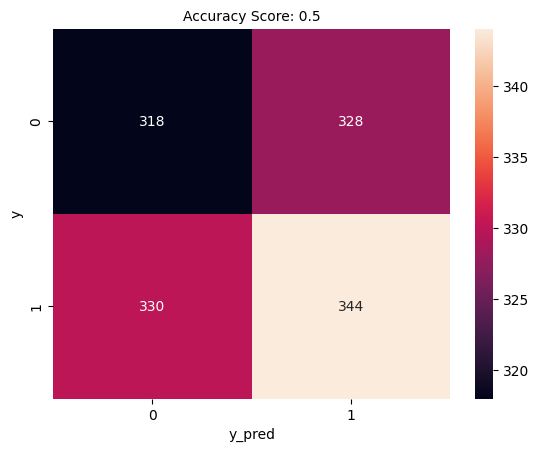

None
Courbe ROC : 


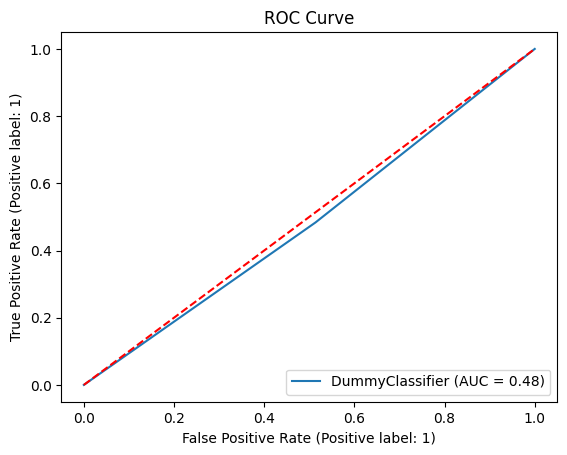

None
===================   LogisticRegression(class_weight='balanced')   ====================
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       646
           1       0.77      0.76      0.77       674

    accuracy                           0.77      1320
   macro avg       0.77      0.77      0.77      1320
weighted avg       0.77      0.77      0.77      1320

Matrice de confusion :


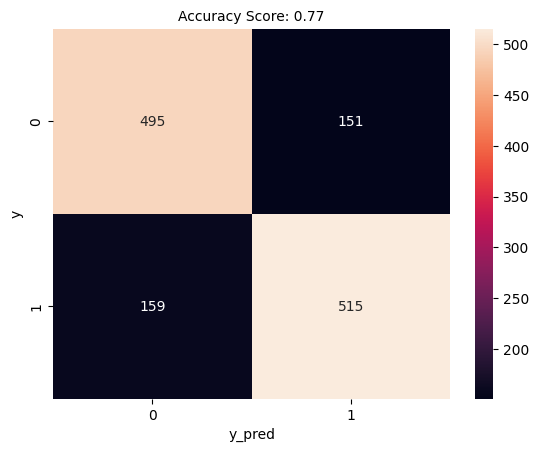

None
Courbe ROC : 


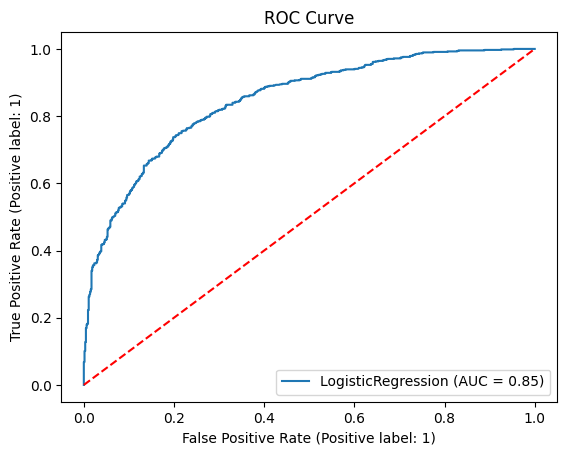

None
===================   DecisionTreeClassifier()   ====================
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       646
           1       0.70      0.71      0.71       674

    accuracy                           0.70      1320
   macro avg       0.70      0.70      0.70      1320
weighted avg       0.70      0.70      0.70      1320

Matrice de confusion :


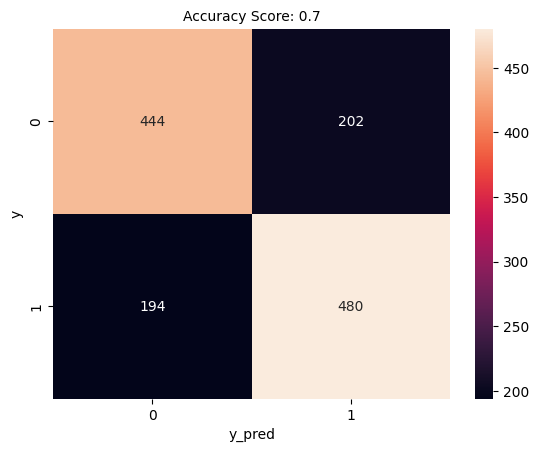

None
Courbe ROC : 


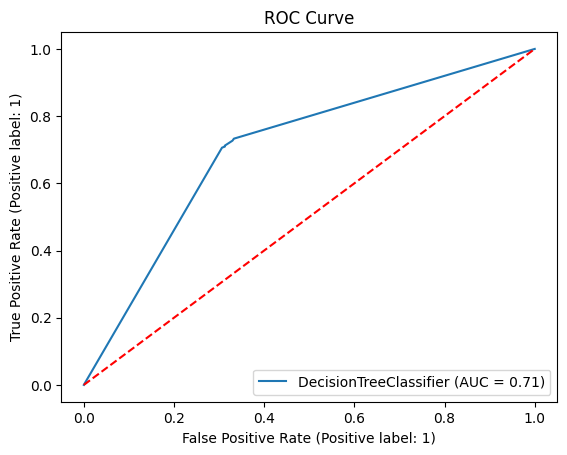

None
===================   GaussianNB()   ====================
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       646
           1       0.85      0.55      0.66       674

    accuracy                           0.72      1320
   macro avg       0.75      0.72      0.71      1320
weighted avg       0.75      0.72      0.71      1320

Matrice de confusion :


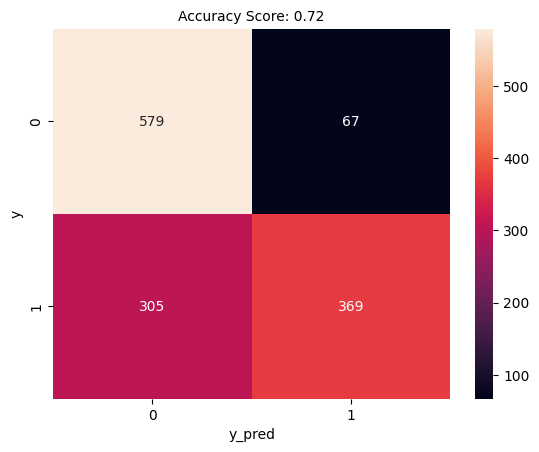

None
Courbe ROC : 


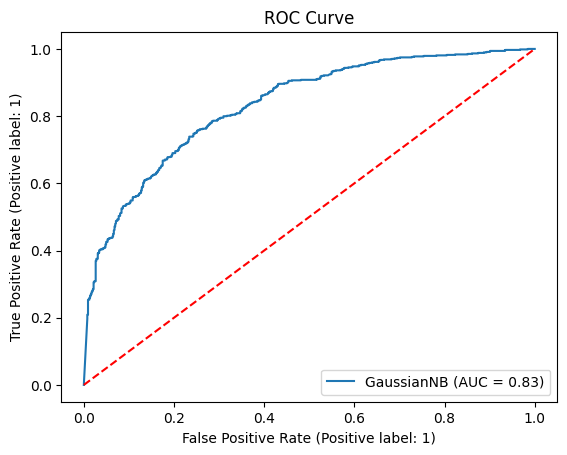

None


In [22]:
resultats_models(df_feat_balanced, liste_models)

# Avec une pincée d'inclusion

Dans le but d'etre plus inclusive, nous avons decidé de supprimer les colonnes qui peuvent discriminer comme Gender of respondent et Age of respondent.

In [23]:
df_feat.columns

Index(['job_type_Formally employed Private',
       'education_level_Tertiary education',
       'job_type_Formally employed Government',
       'education_level_Vocational/Specialised training', 'cellphone_access',
       'education_level_Primary education', 'country_Kenya',
       'education_level_Secondary education',
       'education_level_No formal education', 'location_type',
       'relationship_with_head_Head of Household', 'country_Tanzania',
       'gender_of_respondent', 'year',
       'marital_status_Married/Living together', 'age_of_respondent',
       'job_type_Self employed', 'job_type_Informally employed',
       'marital_status_Single/Never Married', 'country_Rwanda',
       'household_size', 'job_type_Remittance Dependent', 'bank_account'],
      dtype='object')

colonnes à supprimer : 
- gender_of_respondent
- age_of_respondent

In [27]:
df_feat_inclusif = df_feat.drop(["gender_of_respondent", "age_of_respondent"], axis = 1)
df_feat_inclusif.shape

(23524, 21)

In [28]:
df_feat_inclusif_balanced = balance_dataset(df_feat_2, 3300)

Comme précédement on verifie qu'on a bien un  échantillon équilibré. 

In [30]:
df_feat_inclusif_balanced["bank_account"].value_counts()

0    3300
1    3300
Name: bank_account, dtype: int64

## Comparer les différents modèles (données bien équilibrées et avec sélection de feature + une pincée d'inclusion)


===================   DummyClassifier(strategy='stratified')   ====================
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       646
           1       0.50      0.50      0.50       674

    accuracy                           0.49      1320
   macro avg       0.49      0.49      0.49      1320
weighted avg       0.49      0.49      0.49      1320

Matrice de confusion :


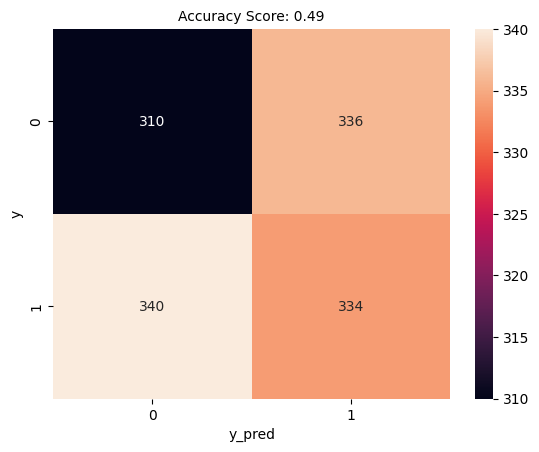

None
Courbe ROC : 


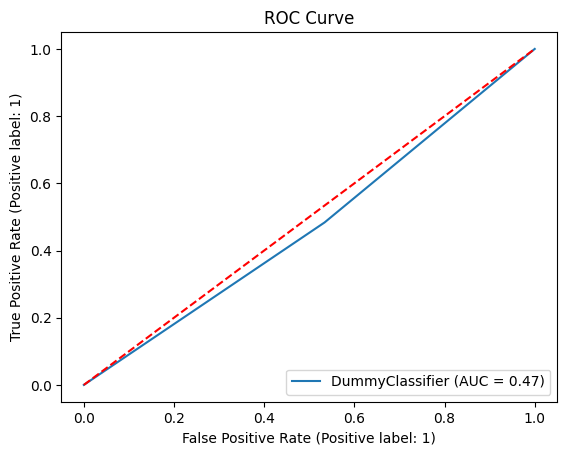

None
===================   LogisticRegression(class_weight='balanced')   ====================
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       646
           1       0.75      0.74      0.75       674

    accuracy                           0.74      1320
   macro avg       0.74      0.74      0.74      1320
weighted avg       0.74      0.74      0.74      1320

Matrice de confusion :


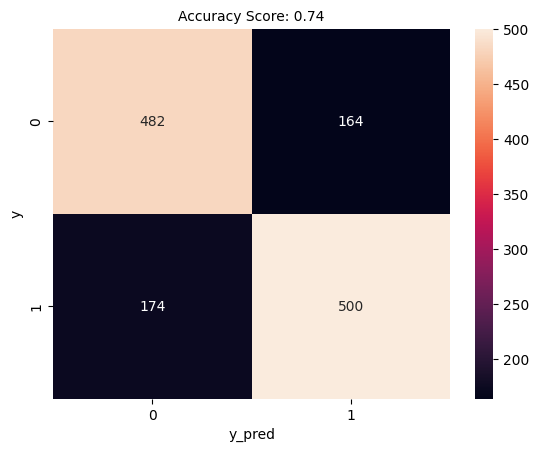

None
Courbe ROC : 


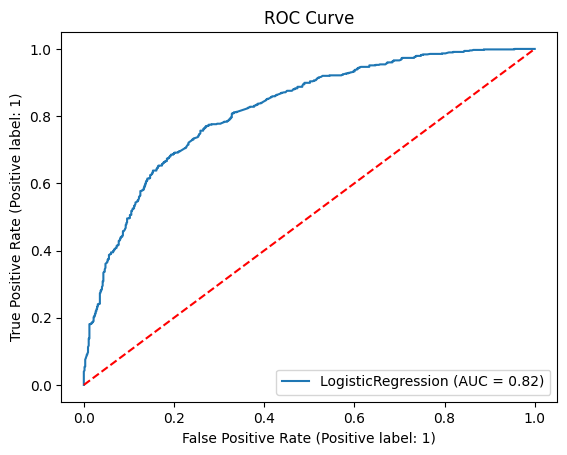

None
===================   DecisionTreeClassifier()   ====================
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       646
           1       0.73      0.64      0.68       674

    accuracy                           0.69      1320
   macro avg       0.70      0.69      0.69      1320
weighted avg       0.70      0.69      0.69      1320

Matrice de confusion :


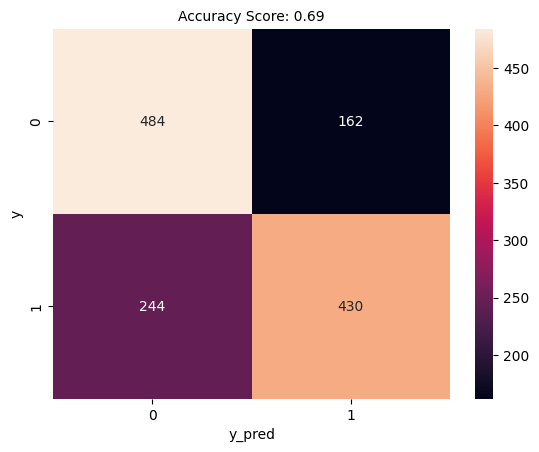

None
Courbe ROC : 


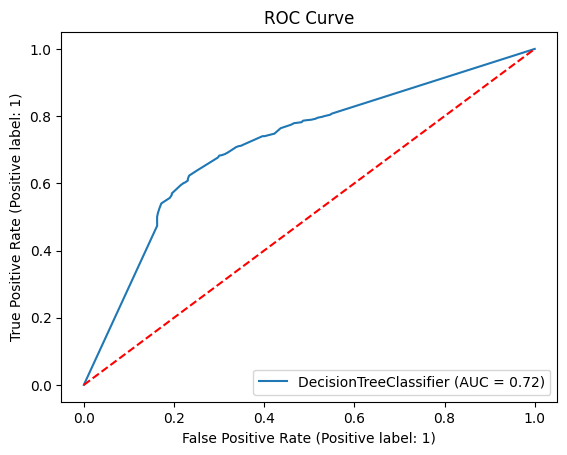

None
===================   GaussianNB()   ====================
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       646
           1       0.83      0.48      0.61       674

    accuracy                           0.68      1320
   macro avg       0.73      0.69      0.67      1320
weighted avg       0.73      0.68      0.67      1320

Matrice de confusion :


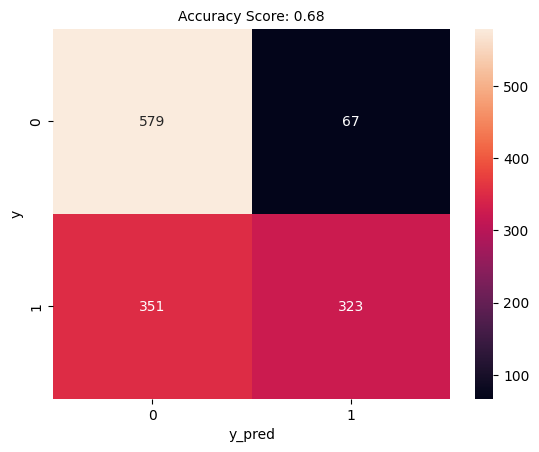

None
Courbe ROC : 


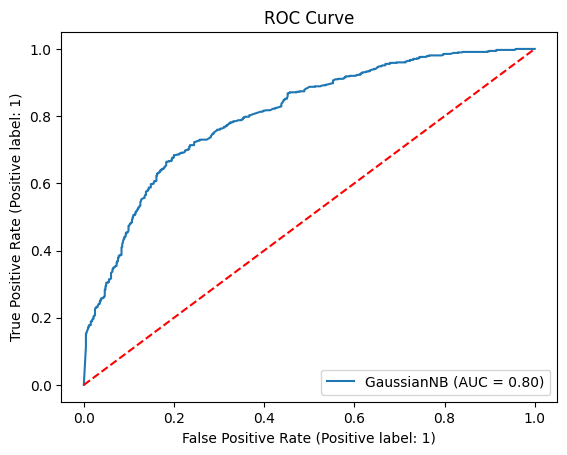

None


In [31]:
resultats_models(df_feat_inclusif_balanced, liste_models)

L'elimination des deux colonnes n'a qu'un faible impacte sur le modéle. On observe que nos metric sont proche de ceux pour l'iteration precedente. Il serait interessant de pouvoir observer si nous nous améliorons bien au niveau de nos prédictions plus inclusives.